### Statistics Day 3


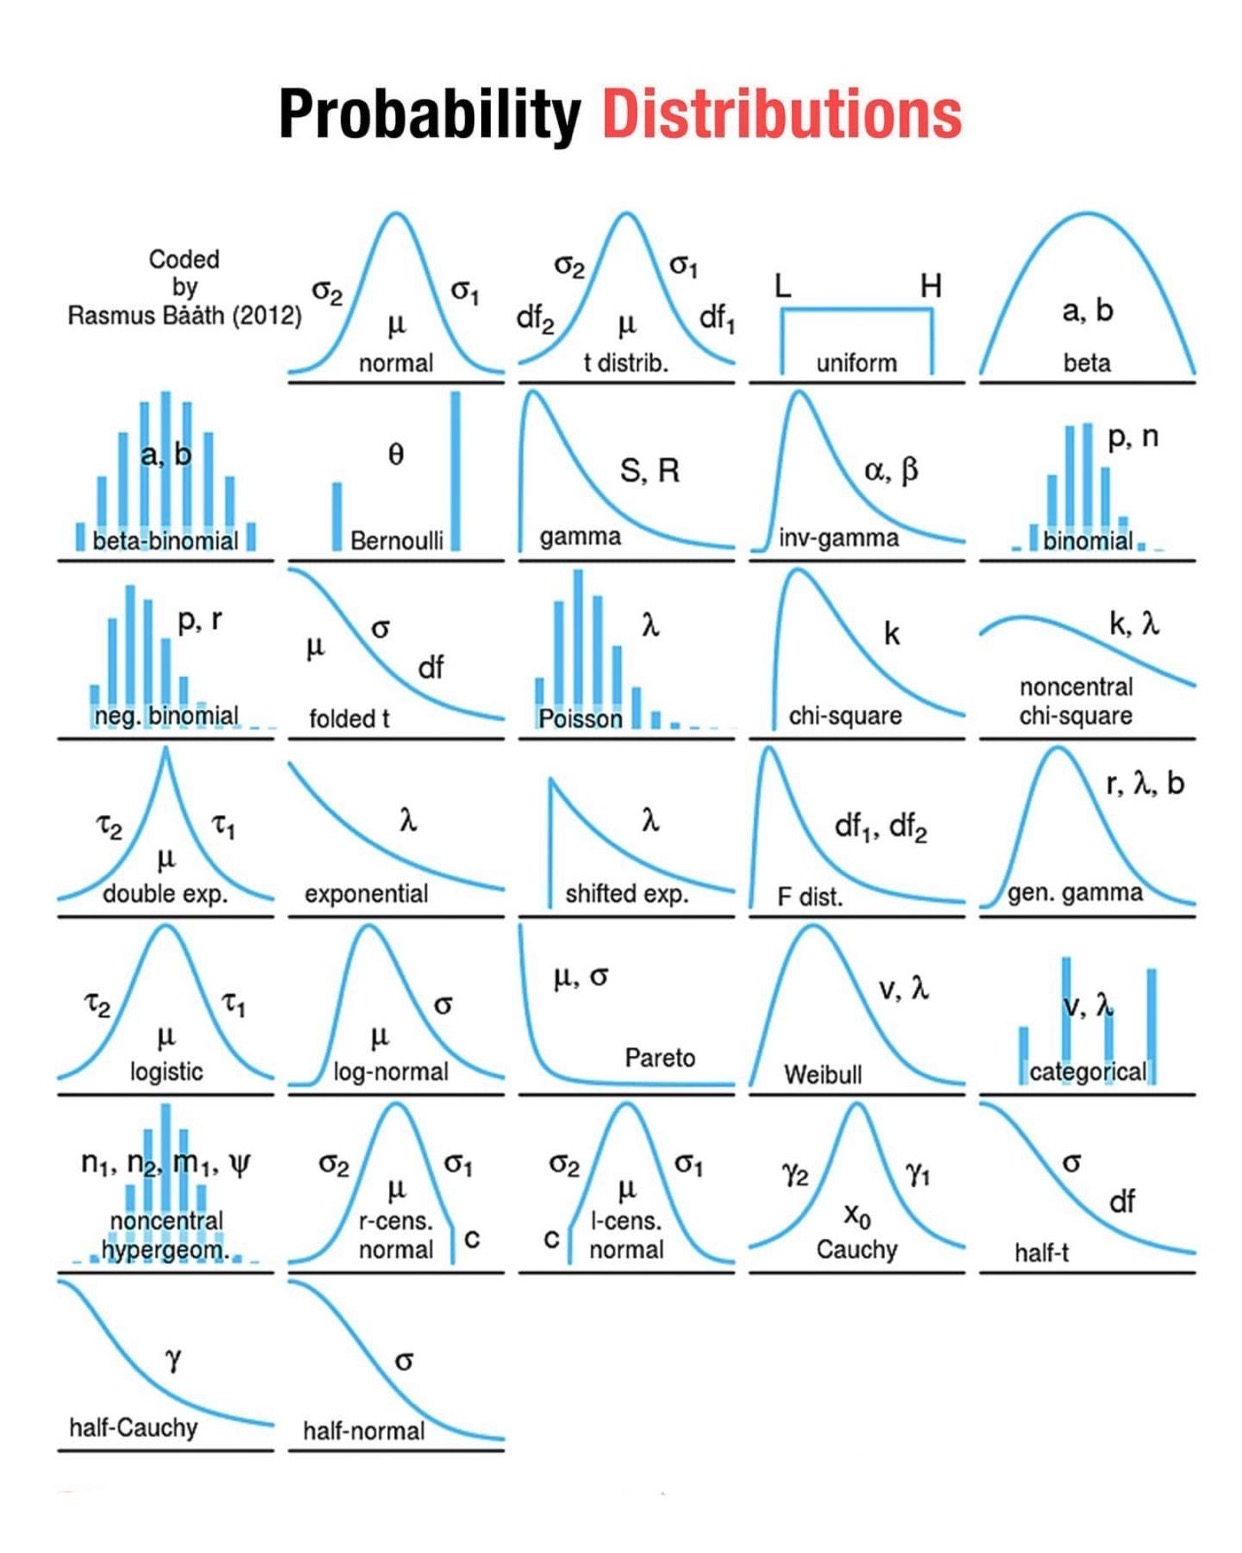

In [225]:
import pandas as pd
import random

In [226]:
# for 2 dices
L=[]
for i in range(10000):
    a=random.randint(1,6)
    b=random.randint(1,6)
    L.append(a+b)

In [227]:
len(L)

10000

In [228]:
L[:5]

[2, 7, 3, 9, 7]

In [229]:
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [230]:
s

2     0.0275
3     0.0534
4     0.0803
5     0.1043
6     0.1390
7     0.1701
8     0.1429
9     0.1138
10    0.0851
11    0.0567
12    0.0269
Name: count, dtype: float64

### plotting PMF

<Axes: >

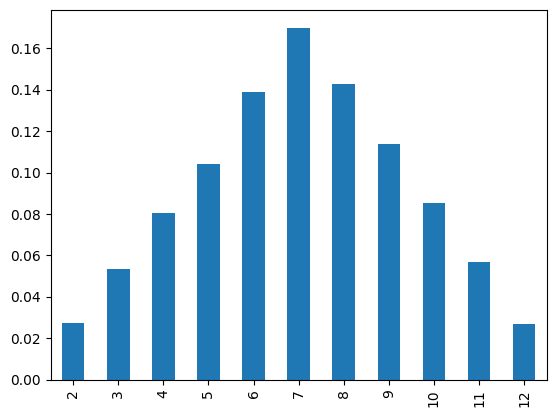

In [231]:
s.plot(kind='bar')

-----
-----

In [232]:
import numpy as np
np.cumsum(s)

2     0.0275
3     0.0809
4     0.1612
5     0.2655
6     0.4045
7     0.5746
8     0.7175
9     0.8313
10    0.9164
11    0.9731
12    1.0000
Name: count, dtype: float64

<Axes: >

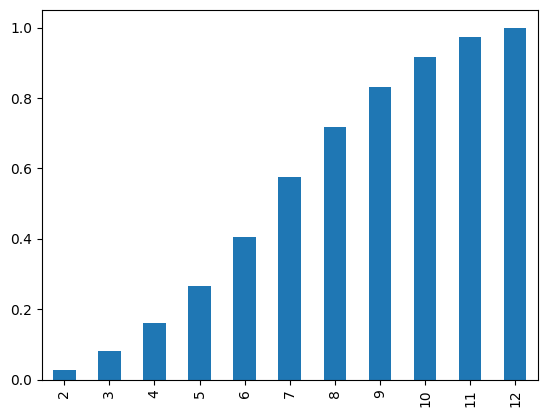

In [233]:
np.cumsum(s).plot(kind='bar')

-----
-----

### Parametric Density Function

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal



In [235]:
sample = normal(loc=50,scale=5,size=1000)
sample.mean()

49.88939745982411

(array([  4.,  14.,  40., 102., 208., 243., 206., 116.,  54.,  13.]),
 array([33.04112046, 36.08336862, 39.12561677, 42.16786493, 45.21011308,
        48.25236124, 51.29460939, 54.33685755, 57.37910571, 60.42135386,
        63.46360202]),
 <BarContainer object of 10 artists>)

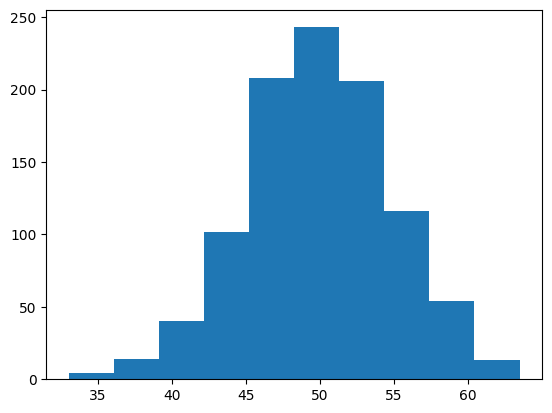

In [236]:
# plotting histogram to understand the distribution of data
plt.hist(sample,bins=10)

-----
-----

In [237]:
# calculate sample mean and sample std deviation
sample_mean =sample.mean()
sample_sde = sample.std()

In [238]:
# fitting the distribution with the above parameters
from scipy.stats import norm


In [239]:
dist = norm(sample_mean,sample_sde)

In [240]:
values = np.linspace(sample.min(),sample.max(),100)
sample.min()

33.04112046311522

In [241]:
sample.max()

63.46360201623254

In [242]:
prob = [dist.pdf(value) for value in values]

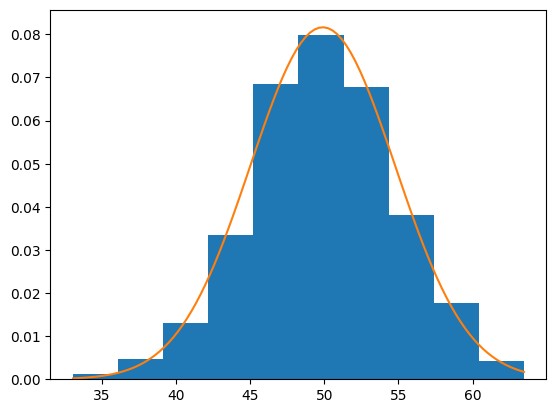

In [243]:
# plotting the histogram
plt.hist(sample,bins=10,density=True)
plt.plot(values,prob)

C:\Users\panka\AppData\Local\Temp\ipykernel_15344\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

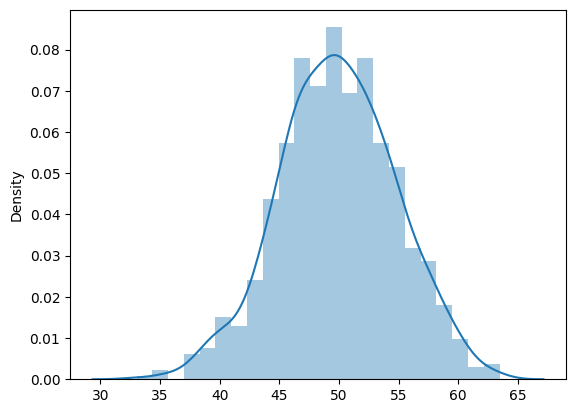

In [244]:
import seaborn as sns
sns.distplot(sample)

-----
-----

### KDE

In [245]:
# sample
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
sample=np.hstack((sample1,sample2))

In [246]:
sample

array([11.9004222 , 21.31639162, 26.47200078, 17.5092925 , 21.11484169,
       19.63884786, 25.60671782, 25.09384463, 19.30474886, 23.7063288 ,
       15.50062215, 29.56463557, 15.21164223, 20.82438786, 18.40117658,
       24.95967172, 15.31109461,  7.23178204, 10.03786997, 27.64791102,
       26.51922397, 11.19970165, 25.77753047, 20.52990963, 31.91176605,
       23.83412406, 22.74483161, 30.95724811, 23.78358283, 30.47569549,
       21.48719222, 15.82391013, 17.77143251, 22.42473425, 13.1881948 ,
       11.77293698, 12.36115499, 18.04696233, 18.22601788, 20.51935526,
       16.79059984, 20.40461308, 30.05995906, 21.59860188, 18.20136433,
       23.0539456 , 24.532094  , 35.55934783, 23.83407531, 26.07268406,
       21.16199185, 12.78390811, 22.91403289, 27.11608548, 19.96873676,
       10.57471448, 21.47584489, 17.94963489, 10.12833332, 25.59955098,
       15.90229071, 26.03422913, 17.88381405, 15.08308673, 28.85651354,
       32.22599822, 15.22486883, 17.70401034, 19.45524764, 15.70

(array([ 1.,  1.,  0.,  2.,  7.,  4., 10., 14.,  8., 11., 17., 18., 23.,
        22., 25., 27., 10., 11., 15., 19., 15., 19.,  8., 10.,  8., 10.,
        18., 19., 26., 26., 35., 50., 50., 41., 55., 50., 54., 49., 58.,
        37., 31., 27., 18., 13., 10.,  7.,  6.,  2.,  0.,  3.]),
 array([ 5.76718807,  6.73417258,  7.70115708,  8.66814159,  9.6351261 ,
        10.6021106 , 11.56909511, 12.53607962, 13.50306412, 14.47004863,
        15.43703314, 16.40401765, 17.37100215, 18.33798666, 19.30497117,
        20.27195567, 21.23894018, 22.20592469, 23.17290919, 24.1398937 ,
        25.10687821, 26.07386271, 27.04084722, 28.00783173, 28.97481624,
        29.94180074, 30.90878525, 31.87576976, 32.84275426, 33.80973877,
        34.77672328, 35.74370778, 36.71069229, 37.6776768 , 38.64466131,
        39.61164581, 40.57863032, 41.54561483, 42.51259933, 43.47958384,
        44.44656835, 45.41355285, 46.38053736, 47.34752187, 48.31450637,
        49.28149088, 50.24847539, 51.2154599 , 52.1824444 ,

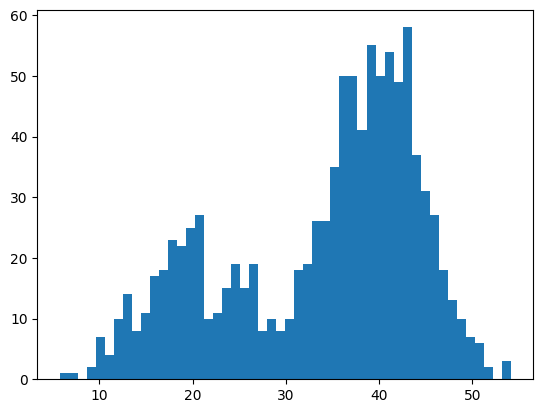

In [247]:
# histogram
plt.hist(sample,bins=50)

In [248]:
from sklearn.neighbors import KernelDensity

In [249]:
model = KernelDensity(bandwidth=3,kernel='gaussian')

#into 2D
sample=sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [250]:
values = np.linspace(sample.min(),sample.max(),100)
values =values.reshape((len(values),1))

In [251]:
prob = model.score_samples(values)
prob = np.exp(prob)

Compute the log-likelihood of each sample under the model.

Parameters
X : array-like of shape (n_samples, n_features)
    An array of points to query. Last dimension should match dimension of training data (n_features).

Returns
density : ndarray of shape (n_samples,)
    Log-likelihood of each sample in X. These are normalized to be probability densities, so values will be low for high-dimensional data.

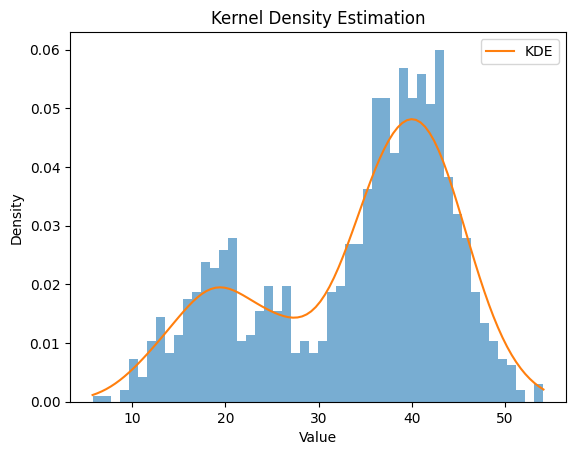

In [252]:
plt.hist(sample, bins=50, density=True, alpha=0.6)
plt.plot(values, prob, label='KDE')
plt.title("Kernel Density Estimation")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: ylabel='Density'>

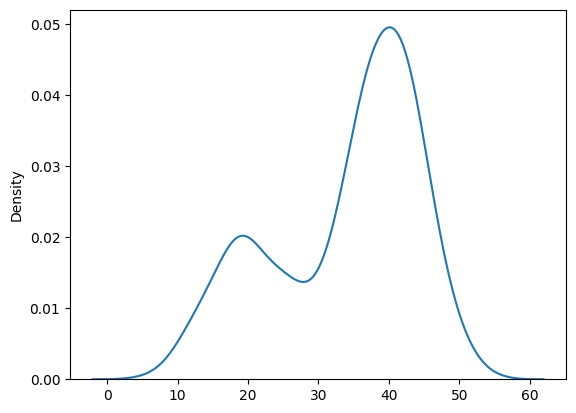

In [253]:
sns.kdeplot(sample.reshape(1000),bw_adjust=1)

-----
-----

### CDF of PDF
area under curve is CDF after integration

and differentiation is PDF


In [254]:
import seaborn as sns


In [255]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

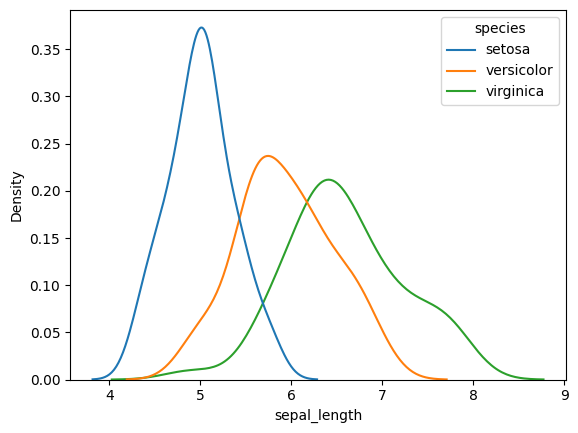

In [256]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

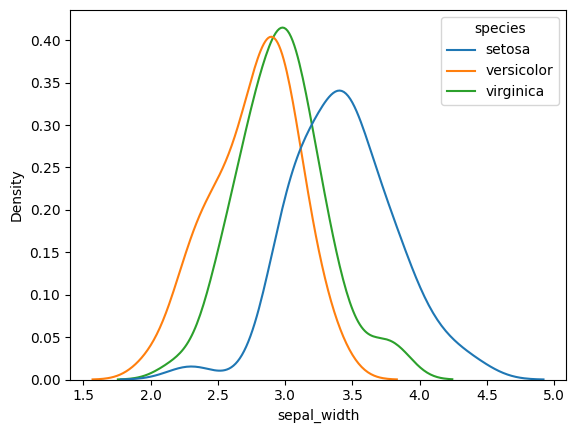

In [257]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

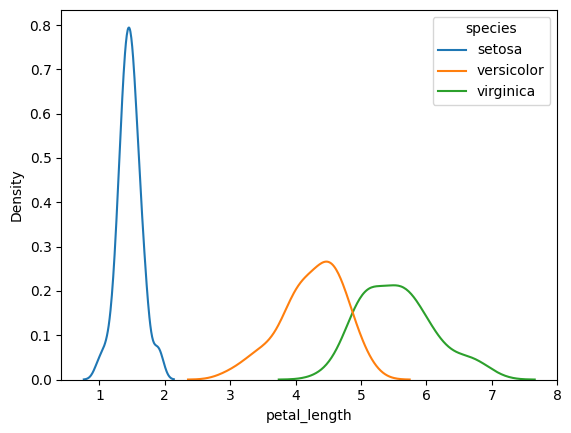

In [258]:
sns.kdeplot(data=df,x='petal_length',hue='species')

### from the above 3 figure, we can say that best column to select is petal length coz it is separating much than other two

<Axes: xlabel='petal_length', ylabel='Density'>

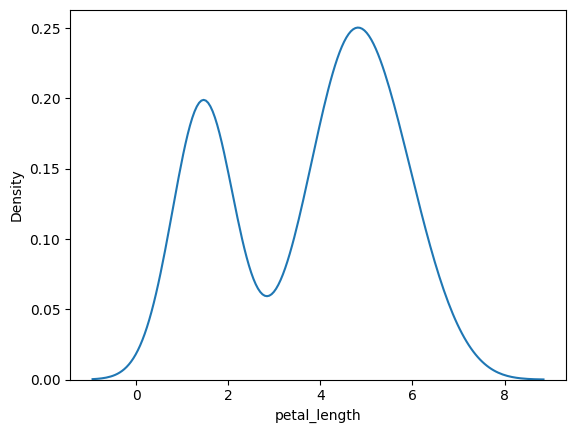

In [259]:
sns.kdeplot(df['petal_length'])

-----
-----

In [260]:
dataset = pd.read_csv(r'D:\copy of htdocs\practice\Python\200days\Day126 EDA\Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

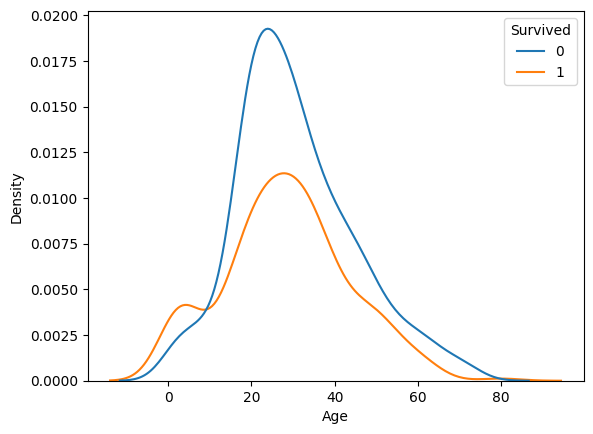

In [261]:
sns.kdeplot(data=dataset,x='Age',hue='Survived')

-----
-----

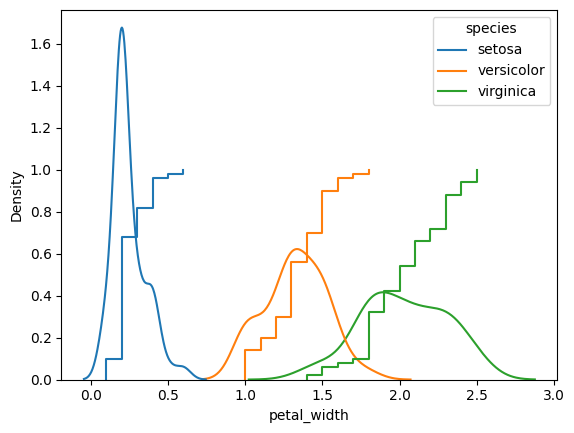

In [262]:
#sns.displot(data=df, x='petal_width', kind='ecdf', hue='species')
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')
plt.show()

### 95% of flower will be versicolor under 0.7-1.7 petal_width and 90% of flower will be virginica  after 1.7 petal_width

-----
-----

## 2D density plots

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'Fill'
  cset = contour_func(


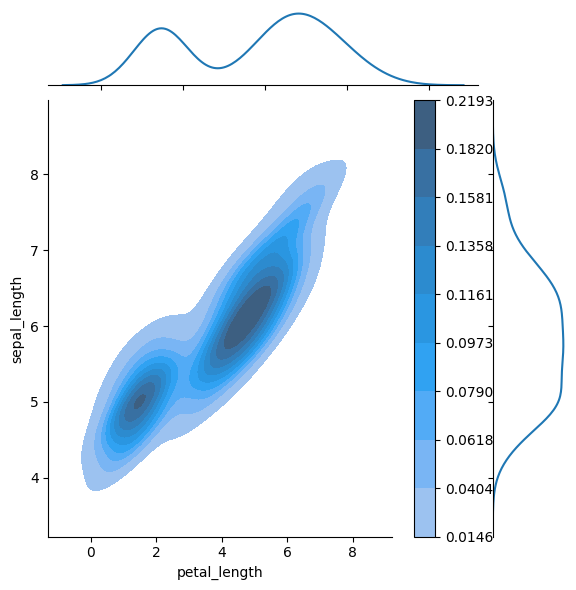

In [266]:
sns.jointplot(data=df,x='petal_length',y='sepal_length',kind='kde',Fill=True,cbar=True,shade=True)

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


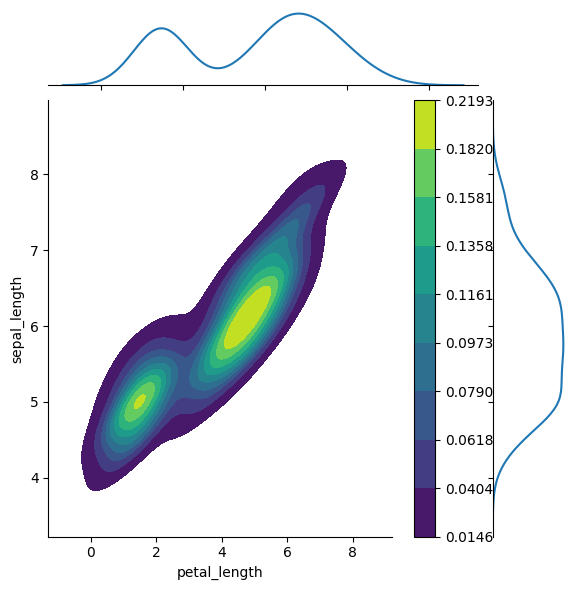

In [265]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', shade=True, cmap='viridis', cbar=True)
plt.show()

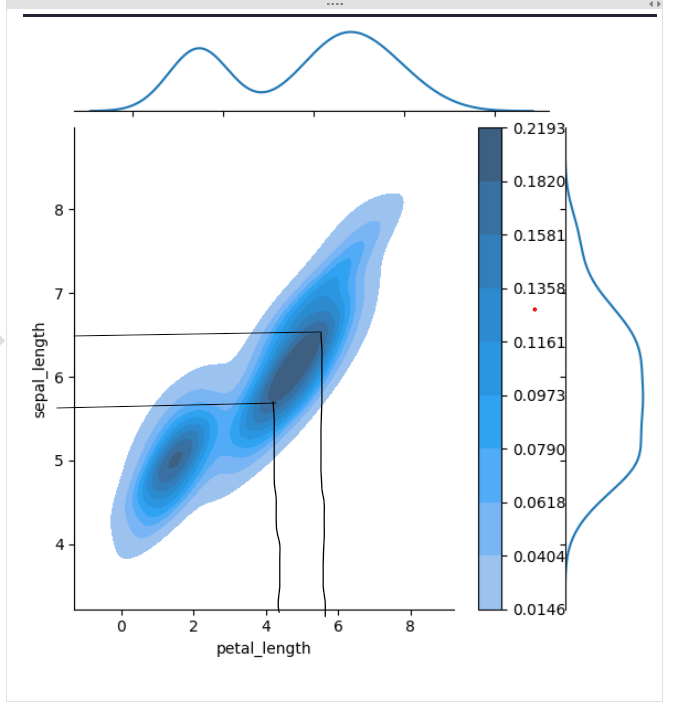

the range under the line is the range where petal length and sepal length lies more 